# 1. Perceptron learning algorithm

In [26]:
from sklearn.datasets import make_blobs
import numpy as np
import sklearn.svm
from matplotlib import pyplot as plt
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [27]:
X, y = make_blobs(n_samples=100, n_features=2, random_state=0,centers=2, cluster_std=0.6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Erreur : 0.0 %


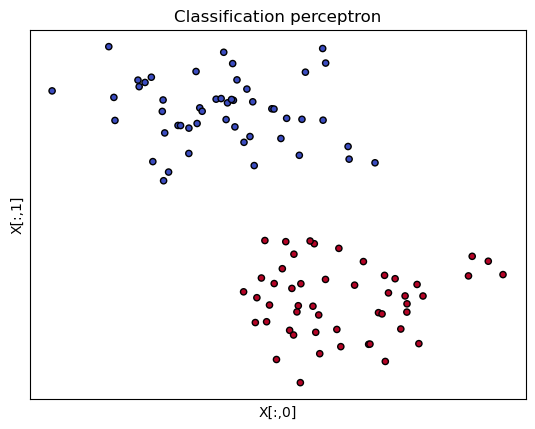

In [64]:
class Neurone_maison:
    def __init__(self, input_length, weights=None, learning_rate=0.1):
            self.weights = weights if weights else np.ones(input_length+1)*0.5
            self.learning_rate = learning_rate
    
    def activation_function(self,x):
        if x > 0.5:
            return 1
        return 0
    
    def output(self, in_data):
        weighted_sum = self.weights[0] + in_data.T@self.weights[1:]
        activation = self.activation_function(weighted_sum)
        return activation
    
    def adjust(self, y_target, y_pred, in_data):
        error = y_target - y_pred

        self.weights[1:] += self.learning_rate * error * in_data
        self.weights[0] += self.learning_rate * error  # bias update

n = Neurone_maison(2)
for k in range(5000):
    #i = np.random.randint(0, len(X_train))
    i=k%len(X_train)
    
    yo = n.output( X_train[i])
    #if yo != y_train[i]:
    n.adjust(y_train[i], yo, X_train[i])

w=0
for x, yt in zip(X_test, y_test):
     yo = n.output(x)
     if yt!=yo:
          w+=1

print("Erreur :", w/len(X_test)*100, "%")

fig, ax = plt.subplots()

#plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=[n.output(x) for x in X], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('X[:,1]')
ax.set_xlabel('X[:,0]')
ax.set_title("Classification perceptron")
ax.set_xticks(())
ax.set_yticks(())
plt.show()